In [29]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import gc
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import os
tf.executing_eagerly()

from tensorflow import keras

In [31]:
df=pd.read_csv(r'/content/drive/MyDrive/Devopedia/all_full_5.csv')
df_author_diagnostics=pd.read_csv(r'/content/drive/MyDrive/Devopedia/Author_diagnostics_full_5.csv')
df.drop(['Title','Author','YoPublishing','Title_encoding','YoP_encoding'],axis=1,inplace=True)

In [32]:
print("Raw Dataset")
print(df.shape)
print("No of 0s: ",len(df[df.Author_encoding==0]))
print("No of 1s: ",len(df[df.Author_encoding==1]))
print("0:1 ratio:",len(df[df.Author_encoding==0])/len(df[df.Author_encoding==1]))

Raw Dataset
(2194434, 5)
No of 0s:  2182944
No of 1s:  11490
0:1 ratio: 189.9864229765013


In [33]:
drop_files=[]

for i in tqdm(df_author_diagnostics.iterrows()):
    if i[1].Distinct_authors_count==0:
        drop_files.append(i[1].Fname)

6761it [00:00, 12000.22it/s]


In [34]:
df= df[~df.fname.isin(drop_files)]

In [35]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [36]:
df

,fname,Author_encoding,SerialNo,Tag,Text
0,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,1,title,Full Page Reload
1,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,2,header,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
2,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,3,ul,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
3,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,4,li,Join IEEE
4,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,5,li,IEEE.org
...,...,...,...,...,...
1634259,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,1,2,head,LoRaTools
1634260,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,3,body,Toggle navigation LoRaTools {{item.name}} var ...
1634261,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,4,div,Toggle navigation LoRaTools {{item.name}}
1634262,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,5,div,Toggle navigation LoRaTools


In [37]:
print("After dropping files")
print(df.shape)
print(len(df[df.Author_encoding==0])/len(df[df.Author_encoding==1]))

After dropping files
(1634264, 5)
141.23359442993907


In [38]:
tag_special_char_check=re.compile('[^a-zA-Z]')

one_hot=pd.get_dummies(df.Tag)

In [39]:
one_hot.shape

(1634264, 301)

In [40]:
allowed_tags=[]

for i in tqdm(one_hot):
  if tag_special_char_check.search(i)==None:
    allowed_tags.append(i)

del one_hot
gc.collect()


  0%|          | 301/1634264 [00:00<00:05, 305021.87it/s]


310

In [41]:
df=df[df.Tag.isin(allowed_tags)]

In [42]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
print("After removing tags with special characters")
print(df.shape)
print(len(df[df.Author_encoding==0])/len(df[df.Author_encoding==1]))

After removing tags with special characters
(1564182, 5)
141.2112919356305


In [44]:
df

,fname,Author_encoding,SerialNo,Tag,Text
0,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,1,title,Full Page Reload
1,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,2,header,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
2,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,3,ul,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
3,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,4,li,Join IEEE
4,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,5,li,IEEE.org
...,...,...,...,...,...
1564177,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,1,2,head,LoRaTools
1564178,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,3,body,Toggle navigation LoRaTools {{item.name}} var ...
1564179,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,4,div,Toggle navigation LoRaTools {{item.name}}
1564180,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,5,div,Toggle navigation LoRaTools


In [45]:
df_author_diagnostics_subset= df_author_diagnostics.sample(n=584,random_state=7)

In [46]:
df_author_diagnostics_subset

,Fname,Distinct_authors_count,Authors
4833,7380f28f55fb114d0abaa5d2a78f6406c1d7491bc9ebf8...,1,"Tan, Richard"
3930,2c92821bb6a500f302a6877fe14d78f44f778029d33b95...,1,"Boyd, Mark"
5940,38b0541749a08a463d424b0132096f923753bf03eab066...,3,"Otter, Daniel W, Julian R Medina, and Jugal K ..."
1769,962bc7d0b705011350a3a867d04e2fe66230d87152a72e...,1,Docker Docs
5919,bce259676b17d9a94717237e14802d5b4f594788d3d7a9...,3,"Honor, Alex"
...,...,...,...
621,540765c67a9a6b8c29e4ed16689aa0441c87cb0f28bc67...,0,"Tidwell, Jenifer"
2050,8e8d0ed63ee7ef7a354da17f9bc74b13c7a4e4b6941189...,1,"Pawlak, Renaud"
6262,a1b5c0aa9ed5c0290ec1c93f5843a68054232cf82dfdef...,4,"Thapa, Damar"
4359,1e8033f96fbf3e07d203316e63c585f7970d8adc224444...,1,"Gienow, Michelle"


In [47]:
test_fnames=list(df_author_diagnostics_subset.Fname)

In [48]:
df_test= df[df.fname.isin(test_fnames)]
df_test.reset_index(inplace=True)
df_test.drop('index',axis=1,inplace=True)

df_train=df[~df.fname.isin(test_fnames)]
df_train.reset_index(inplace=True)
df_train.drop('index',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df_train

,fname,Author_encoding,SerialNo,Tag,Text
0,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,1,title,Full Page Reload
1,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,2,header,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
2,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,3,ul,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
3,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,4,li,Join IEEE
4,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,5,li,IEEE.org
...,...,...,...,...,...
1403511,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,1,2,head,LoRaTools
1403512,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,3,body,Toggle navigation LoRaTools {{item.name}} var ...
1403513,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,4,div,Toggle navigation LoRaTools {{item.name}}
1403514,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,5,div,Toggle navigation LoRaTools


In [50]:
df_test

,fname,Author_encoding,SerialNo,Tag,Text
0,00e817bdd417acf19451548f020f01b3daab39f9e07d78...,0,1,aside,Donate to arXiv Please join the Simons Foundat...
1,00e817bdd417acf19451548f020f01b3daab39f9e07d78...,0,2,div,Donate to arXiv Please join the Simons Foundat...
2,00e817bdd417acf19451548f020f01b3daab39f9e07d78...,0,4,p,Please join the Simons Foundation and our gene...
3,00e817bdd417acf19451548f020f01b3daab39f9e07d78...,0,5,a,Simons Foundation
4,00e817bdd417acf19451548f020f01b3daab39f9e07d78...,0,6,a,member organizations
...,...,...,...,...,...
160661,ffdffbfbeaa3d2b83d61ec162615a00a6459ad308fbf39...,0,244,p,Jim is a principal analyst and partner at TIRI...
160662,ffdffbfbeaa3d2b83d61ec162615a00a6459ad308fbf39...,0,245,div,Jim is a principal analyst and partner at TIRI...
160663,ffdffbfbeaa3d2b83d61ec162615a00a6459ad308fbf39...,0,246,p,Jim is a principal analyst and partner at TIRI...
160664,ffdffbfbeaa3d2b83d61ec162615a00a6459ad308fbf39...,0,247,div,PrintReprints & Permissions


In [51]:
print("Train Dataset")
print(df_train.shape)
print("No of 0s: ",len(df_train[df_train.Author_encoding==0]))
print("No of 1s: ",len(df_train[df_train.Author_encoding==1]))
print("0:1 ratio:",len(df_train[df_train.Author_encoding==0])/len(df_train[df_train.Author_encoding==1]))
print("-"*50)
print("Test Dataset")
print(df_test.shape)
print("No of 0s: ",len(df_test[df_test.Author_encoding==0]))
print("No of 1s: ",len(df_test[df_test.Author_encoding==1]))
print("0:1 ratio:",len(df_test[df_test.Author_encoding==0])/len(df_test[df_test.Author_encoding==1]))

Train Dataset
(1403516, 5)
No of 0s:  1393469
No of 1s:  10047
0:1 ratio: 138.69503334328655
--------------------------------------------------
Test Dataset
(160666, 5)
No of 0s:  159714
No of 1s:  952
0:1 ratio: 167.76680672268907


In [52]:
!pip install ner-d

from nerd import ner

In [55]:
train_caps=[]
train_first_token_upper=[]
train_comma_percent=[]
train_no_of_tokens=[]
train_first_letter_upper=[]



for i in tqdm(df_train.iterrows()):
    text=str(i[1].Text)
    token_list=re.findall(r'\w+', text)
    no_toks = len(token_list)

    try:
      train_first_letter_upper.append(len([x for x in token_list if x[0].isupper()])/no_toks)
    except:
      train_first_letter_upper.append(0)

    x=len(re.findall(r'[A-Z]',text))
    train_caps.append(x)

    train_no_of_tokens.append(no_toks)
    
    try:
      train_comma_percent.append(text.count(',')/no_toks)
    except:
      train_comma_percent.append(0)
    
    if text.split()[0].isupper():
        train_first_token_upper.append(1)
    else:
        train_first_token_upper.append(0)
    


0it [00:00, ?it/s]
1it [00:00,  8.71it/s]
1051it [00:00, 12.44it/s]
2162it [00:00, 17.76it/s]
3273it [00:00, 25.36it/s]
4196it [00:00, 36.18it/s]
5225it [00:00, 51.61it/s]
6383it [00:00, 73.58it/s]
7410it [00:00, 104.80it/s]
8543it [00:00, 149.12it/s]
9670it [00:01, 211.82it/s]
10807it [00:01, 300.21it/s]
11884it [00:01, 423.23it/s]
12928it [00:01, 593.95it/s]
13979it [00:01, 828.43it/s]
15018it [00:01, 1144.28it/s]
16075it [00:01, 1562.15it/s]
17135it [00:01, 2099.06it/s]
18211it [00:01, 2767.13it/s]
19297it [00:01, 3563.80it/s]
20427it [00:02, 4484.53it/s]
21512it [00:02, 5340.37it/s]
22560it [00:02, 6223.39it/s]
23629it [00:02, 7115.02it/s]
24676it [00:02, 7865.16it/s]
25755it [00:02, 8560.33it/s]
26811it [00:02, 8906.09it/s]
27916it [00:02, 9455.48it/s]
28972it [00:02, 9666.12it/s]
30078it [00:02, 10044.31it/s]
31141it [00:03, 9716.02it/s] 
32156it [00:03, 9606.53it/s]
33148it [00:03, 9509.55it/s]
34121it [00:03, 9468.32it/s]
35083it [00:03, 9375.11it/s]
36194it [00:03, 9833.78it/

In [60]:
df_train

,fname,Author_encoding,SerialNo,Tag,Text
0,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,1,title,Full Page Reload
1,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,2,header,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
2,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,3,ul,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
3,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,4,li,Join IEEE
4,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,5,li,IEEE.org
...,...,...,...,...,...
1403511,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,1,2,head,LoRaTools
1403512,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,3,body,Toggle navigation LoRaTools {{item.name}} var ...
1403513,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,4,div,Toggle navigation LoRaTools {{item.name}}
1403514,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,5,div,Toggle navigation LoRaTools


In [78]:
lol=df_train[:100]
lol

,fname,Author_encoding,SerialNo,Tag,Text,NERs
0,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,1,title,Full Page Reload,Full Page Reload
1,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,2,header,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
2,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,3,ul,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
3,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,4,li,Join IEEE,Join IEEE
4,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,5,li,IEEE.org,IEEE.org
...,...,...,...,...,...,...
95,001a52277fbca48c983f0b66e3af702facd66153a4fcb2...,0,83,ul,Abuse DetectionAnalyzing Usage Patterns,Abuse DetectionAnalyzing Usage Patterns
96,001a52277fbca48c983f0b66e3af702facd66153a4fcb2...,0,84,li,Abuse Detection,Abuse Detection
97,001a52277fbca48c983f0b66e3af702facd66153a4fcb2...,0,85,li,Analyzing Usage Patterns,Analyzing Usage Patterns
98,001a52277fbca48c983f0b66e3af702facd66153a4fcb2...,0,86,li,Next Steps,Next Steps


In [ ]:
  doc = ner.name(text, language='en_core_web_sm')
  train_NERs.append(len([(X.label_) for X in doc if X.label_ in req_entities]))

In [82]:
req_entities=['PERSON','GPE']
x=[1 for i in lol.Text if ner.name(str(lol.Text), language='en_core_web_sm')]

In [80]:
y=[len([(X.label_) for X in doc if X.label_ in req_entities]) for doc in ner.name(str(lol.Text), language='en_core_web_sm')]

AttributeError: ignored

In [62]:
df_train

,fname,Author_encoding,SerialNo,Tag,Text,NERs
0,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,1,title,Full Page Reload,Full Page Reload
1,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,2,header,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
2,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,3,ul,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...
3,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,4,li,Join IEEE,Join IEEE
4,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,5,li,IEEE.org,IEEE.org
...,...,...,...,...,...,...
1403511,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,1,2,head,LoRaTools,LoRaTools
1403512,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,3,body,Toggle navigation LoRaTools {{item.name}} var ...,Toggle navigation LoRaTools {{item.name}} var ...
1403513,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,4,div,Toggle navigation LoRaTools {{item.name}},Toggle navigation LoRaTools {{item.name}}
1403514,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,5,div,Toggle navigation LoRaTools,Toggle navigation LoRaTools


In [57]:
train_NERs=[]

req_entities=['PERSON','GPE']

for i in tqdm(df_train.iterrows()):
  text=str(i[1].Text)
  doc = ner.name(text, language='en_core_web_sm')
  train_NERs.append(len([(X.label_) for X in doc if X.label_ in req_entities]))



0it [00:00, ?it/s]

1it [00:00,  1.33it/s]

2it [00:01,  1.50it/s]

3it [00:01,  1.64it/s]

4it [00:02,  1.62it/s]

5it [00:02,  1.75it/s]

6it [00:03,  1.69it/s]

7it [00:03,  1.81it/s]

8it [00:04,  1.74it/s]

9it [00:04,  1.85it/s]

10it [00:05,  1.74it/s]

11it [00:06,  1.85it/s]

12it [00:06,  1.75it/s]

13it [00:07,  1.86it/s]

14it [00:07,  1.77it/s]

15it [00:08,  1.88it/s]

16it [00:08,  1.77it/s]

17it [00:09,  1.88it/s]

18it [00:10,  1.79it/s]

19it [00:10,  1.87it/s]

20it [00:11,  1.75it/s]

21it [00:11,  1.85it/s]

22it [00:12,  1.74it/s]

23it [00:12,  1.83it/s]

24it [00:13,  1.73it/s]

25it [00:13,  1.83it/s]

26it [00:14,  1.74it/s]

27it [00:14,  1.85it/s]

28it [00:15,  1.75it/s]

29it [00:16,  1.84it/s]

30it [00:16,  1.93it/s]

31it [00:17,  1.81it/s]

32it [00:17,  1.91it/s]

33it [00:18,  1.78it/s]

34it [00:18,  1.88it/s]

35it [00:19,  1.77it/s]

36it [00:19,  1.88it/s]

37it [00:20,  1.79it/s]

38it [00:20,  1.89it/s]

39it [00:21,  1.78it/s]

40it [00:22,

KeyboardInterrupt: ignored

In [ ]:
df_train['caps_count']=np.array(train_caps)
df_train['first_token_upper']=np.array(train_first_token_upper)
df_train['comma_percent']=np.array(train_comma_percent)
df_train['No_of_tokens']=np.array(train_no_of_tokens)
df_train['first_letter_upper']=np.array(train_first_letter_upper)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
test_caps=[]
test_first_token_upper=[]
test_first_letter_upper=[]
test_comma_percent=[]
test_no_of_tokens=[]


for i in tqdm(df_test.iterrows()):
    text=str(i[1].Text)
    token_list=re.findall(r'\w+', text)
    no_toks = len(token_list)

    try:
      test_first_letter_upper.append(len([x for x in token_list if x[0].isupper()])/no_toks)
    except:
      test_first_letter_upper.append(0)

    x=len(re.findall(r'[A-Z]',text))
    test_caps.append(x)

    test_no_of_tokens.append(no_toks)
    
    try:
      test_comma_percent.append(text.count(',')/no_toks)
    except:
      test_comma_percent.append(0)
    
    if text.split()[0].isupper():
        test_first_token_upper.append(1)
    else:
        test_first_token_upper.append(0)
    

160666it [00:14, 11453.24it/s]


In [ ]:
test_NERs=[]

req_entities=['PERSON','GPE']

for i in tqdm(df_test.iterrows()):
  text=str(i[1].Text)
  doc = ner.name(text, language='en_core_web_sm')
  test_NERs.append(len([(X.label_) for X in doc if X.label_ in req_entities]))

In [ ]:
df_test['caps_count']=np.array(test_caps)
df_test['first_token_upper']=np.array(test_first_token_upper)
df_test['comma_percent']=np.array(test_comma_percent)
df_test['No_of_tokens']=np.array(test_no_of_tokens)
df_test['first_letter_upper']=np.array(test_first_letter_upper)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403516 entries, 0 to 1403515
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   fname               1403516 non-null  object 
 1   Author_encoding     1403516 non-null  int64  
 2   SerialNo            1403516 non-null  int64  
 3   Tag                 1403516 non-null  object 
 4   Text                1403349 non-null  object 
 5   caps_count          1403516 non-null  int64  
 6   first_token_upper   1403516 non-null  int64  
 7   comma_percent       1403516 non-null  float64
 8   No_of_tokens        1403516 non-null  int64  
 9   first_letter_upper  1403516 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 107.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160666 entries, 0 to 160665
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   ---

In [ ]:
print("Train Dataset")
print(df_train.shape)
print("No of 0s: ",len(df_train[df_train.Author_encoding==0]))
print("No of 1s: ",len(df_train[df_train.Author_encoding==1]))
print("0:1 ratio:",len(df_train[df_train.Author_encoding==0])/len(df_train[df_train.Author_encoding==1]))
print("-"*50)
print("Test Dataset")
print(df_test.shape)
print("No of 0s: ",len(df_test[df_test.Author_encoding==0]))
print("No of 1s: ",len(df_test[df_test.Author_encoding==1]))
print("0:1 ratio:",len(df_test[df_test.Author_encoding==0])/len(df_test[df_test.Author_encoding==1]))

Train Dataset
(1403516, 10)
No of 0s:  1393469
No of 1s:  10047
0:1 ratio: 138.69503334328655
--------------------------------------------------
Test Dataset
(160666, 10)
No of 0s:  159714
No of 1s:  952
0:1 ratio: 167.76680672268907


In [ ]:
from sklearn.preprocessing import OneHotEncoder

OHE=OneHotEncoder(handle_unknown='ignore',sparse=False)

In [ ]:
OH_train_cols=pd.DataFrame(OHE.fit_transform(np.array(df_train['Tag']).reshape(-1,1)))
OH_test_cols=pd.DataFrame(OHE.transform(np.array(df_test['Tag']).reshape(-1,1)))

In [ ]:
from joblib import dump, load

dump(OHE, 'OHE.joblib') # save the model
# clf = load('filename.joblib') # load and reuse the model

['OHE.joblib']

In [ ]:
print(OH_train_cols.shape)
print(OH_test_cols.shape)

(1403516, 139)
(160666, 139)


In [ ]:
df_train=df_train.join(OH_train_cols)
del OH_train_cols
gc.collect()

0

In [ ]:
df_train

,fname,Author_encoding,SerialNo,Tag,Text,caps_count,first_token_upper,comma_percent,No_of_tokens,first_letter_upper,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
0,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,1,title,Full Page Reload,3,0,0.00,3,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,2,header,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...,32,0,0.00,18,0.944444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,3,ul,Join IEEE | IEEE.org | IEEE Xplore Digital Lib...,28,0,0.00,14,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,4,li,Join IEEE,5,0,0.00,2,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00031cefe68278406ddac7764d46275a56a13558c3bfee...,0,5,li,IEEE.org,4,0,0.00,2,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403511,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,1,2,head,LoRaTools,3,0,0.00,1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1403512,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,3,body,Toggle navigation LoRaTools {{item.name}} var ...,9,0,0.06,50,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1403513,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,4,div,Toggle navigation LoRaTools {{item.name}},4,0,0.00,5,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1403514,fffe5eb5158dc707f949370abe44dd3d6ce77f63010156...,0,5,div,Toggle navigation LoRaTools,4,0,0.00,3,0.666667,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df_test=df_test.join(OH_test_cols)
del OH_test_cols
gc.collect()

50

In [ ]:
df_train.drop(['fname','Tag','Text'],axis=1,inplace=True)
df_test.drop(['fname','Tag','Text'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(df_train.shape)
print(df_test.shape)

(1403516, 146)
(160666, 7)


In [ ]:
df_train=df_train[df_train.SerialNo<1009]

df_train0=df_train[df_train.Author_encoding==0]
df_train1=df_train[df_train.Author_encoding==1]

df_test=df_test[df_test.SerialNo<1009]

df_test0=df_test[df_test.Author_encoding==0]
df_test1=df_test[df_test.Author_encoding==1]

In [ ]:
df_train1=pd.concat([df_train1]*10, ignore_index=True)
df_train0=df_train0.sample(frac=0.4,random_state=7)
df_train=pd.concat([df_train0,df_train1],ignore_index=True)


In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(568573, 146)
(113730, 146)


In [ ]:
print(df_train.shape)
print(df_test.shape)

print(f'Train 0:1 proportion:       {len(df_train0)/len(df_train1)}')
print(f'Test 0:1 proportion:       {len(df_test0)/len(df_test1)}')

(568573, 146)
(113730, 146)
Train 0:1 proportion:       4.787002544529262
Test 0:1 proportion:       124.66850828729282


In [ ]:
df_train.reset_index(inplace=True)
df_train.drop('index',axis=1,inplace=True)

df_test.reset_index(inplace=True)
df_test.drop('index',axis=1,inplace=True)

In [ ]:
df_train

,Author_encoding,SerialNo,caps_count,first_token_upper,comma_percent,No_of_tokens,first_letter_upper,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,...,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138
0,0,352,7,0,0.000000,9,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,787,14,0,0.018519,54,0.259259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,177,27,0,0.014493,69,0.304348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,77,5,0,0.000000,7,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,14,1,0,0.000000,2,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568568,0,698,0,0,0.000000,2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568569,0,459,1,0,0.000000,12,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568570,0,53,1,0,0.000000,2,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568571,0,528,1,0,0.000000,2,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
negs=len(df_train[df_train.Author_encoding==0])
pos=len(df_train[df_train.Author_encoding==1])
print ('Negatives:',negs )
print ('Positives:', pos)
total=negs+pos

Negatives: 470323
Positives: 98250


In [ ]:
weight_for_0 = (1 / negs) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
class_weight

{0: 0.6044494953468148, 1: 2.893501272264631}

In [ ]:
y_train=df_train.pop("Author_encoding")
y_test=df_test.pop("Author_encoding")

In [ ]:
print(df_train.shape)
print(df_test.shape)
print(y_train.shape)
print(y_test.shape)

(568573, 145)
(113730, 145)
(568573,)
(113730,)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
inputs = keras.Input(shape=(145))
x = layers.Dense(256, activation="relu", name="first_layer")(inputs)
x= layers.Dropout(0.3)(x)
x = layers.Dense(128, activation="relu", name="second_layer")(x)
x= layers.Dropout(0.2)(x)
x = layers.Dense(64, activation="relu", name="third_layer")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs,name="Basic_ANN")

model.summary()

Model: "Basic_ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 145)]             0         
_________________________________________________________________
first_layer (Dense)          (None, 256)               37376     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
second_layer (Dense)         (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
third_layer (Dense)          (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 1)                 65

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"],
)

In [ ]:
history=model.fit(df_train,y_train, batch_size=1024, epochs=50, verbose=1)

Epoch 1/50
556/556 [==============================] - 9s 15ms/step - loss: 0.6828 - accuracy: 0.7942
Epoch 2/50
556/556 [==============================] - 8s 15ms/step - loss: 0.4902 - accuracy: 0.8229
Epoch 3/50
556/556 [==============================] - 8s 15ms/step - loss: 0.4629 - accuracy: 0.8261
Epoch 4/50
556/556 [==============================] - 8s 15ms/step - loss: 0.4453 - accuracy: 0.8272
Epoch 5/50
556/556 [==============================] - 8s 15ms/step - loss: 0.4200 - accuracy: 0.8386
Epoch 6/50
556/556 [==============================] - 8s 15ms/step - loss: 0.3934 - accuracy: 0.8491
Epoch 7/50
556/556 [==============================] - 8s 15ms/step - loss: 0.3729 - accuracy: 0.8567
Epoch 8/50
556/556 [==============================] - 8s 15ms/step - loss: 0.3585 - accuracy: 0.8620
Epoch 9/50
556/556 [==============================] - 8s 15ms/step - loss: 0.3480 - accuracy: 0.8670
Epoch 10/50
556/556 [==============================] - 8s 15ms/step - loss: 0.3391 - accura

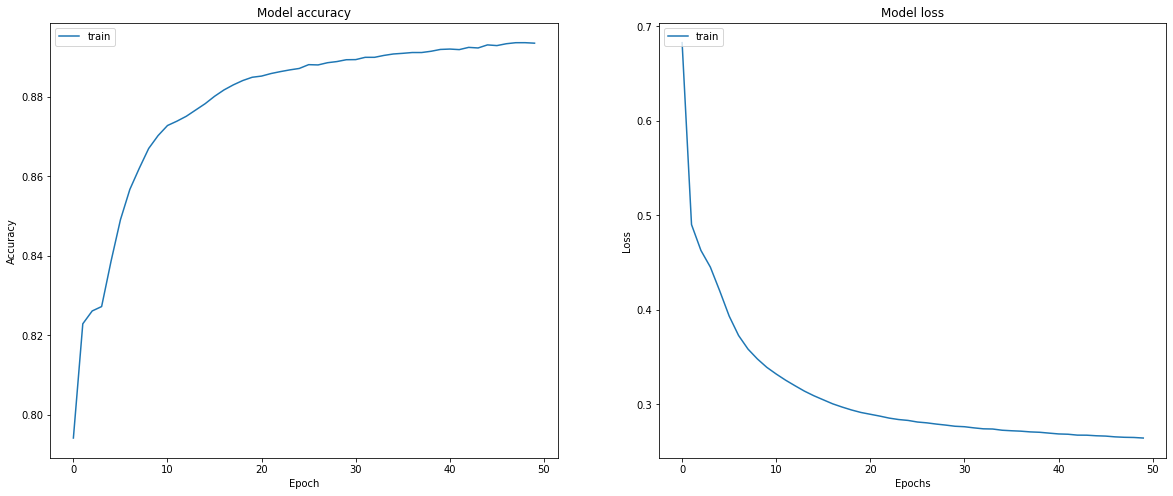

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')

#plt.savefig('Model_training_history.png')

In [ ]:
model.evaluate(df_test,y_test)

3555/3555 [==============================] - 4s 1ms/step - loss: 0.1199 - accuracy: 0.9678


[0.11988162994384766, 0.967827320098877]

In [ ]:
y_preds = model.predict(df_test)

Best Threshold=0.171553, G-Mean=0.803


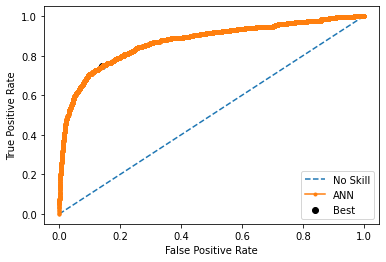

In [ ]:
from sklearn.metrics import roc_curve



# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
# # plot no skill
# plt.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # show the plot
# plt.show()


gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:


predicted_categories = np.where(y_preds > thresholds[ix], 1, 0)

true_categories = y_test

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predicted_categories, true_categories)

array([[97023,   228],
       [15802,   677]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(predicted_categories, true_categories))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     97251
           1       0.75      0.04      0.08     16479

    accuracy                           0.86    113730
   macro avg       0.80      0.52      0.50    113730
weighted avg       0.84      0.86      0.80    113730



In [ ]:
model.save('basic_ANN1_model',save_format='tf')

INFO:tensorflow:Assets written to: basic_ANN1_model/assets


In [ ]:
!zip -r /content/file.zip /content/basic_ANN_model

  adding: content/basic_ANN_model/ (stored 0%)
  adding: content/basic_ANN_model/assets/ (stored 0%)
  adding: content/basic_ANN_model/saved_model.pb (deflated 88%)
  adding: content/basic_ANN_model/keras_metadata.pb (deflated 88%)
  adding: content/basic_ANN_model/variables/ (stored 0%)
  adding: content/basic_ANN_model/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: content/basic_ANN_model/variables/variables.index (deflated 64%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>